In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df1 = df.drop("customerID",axis = 1)

In [30]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [33]:
 df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [39]:
pd.to_numeric(df1.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [48]:
df1[pd.to_numeric(df1.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
df2 = df1[df1.TotalCharges!=' ']

In [54]:
df2.shape

(7032, 20)

In [56]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)

In [59]:
df2.TotalCharges.dtypes

dtype('float64')

In [64]:
t_no =  df2[df2.Churn =="No"].tenure
t_yes = df2[df2.Churn =="Yes"].tenure

In [66]:
t_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

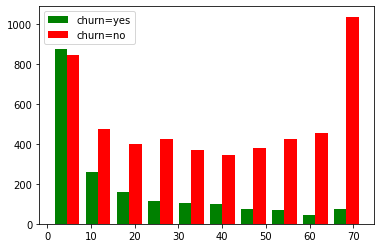

In [76]:
plt.hist([t_yes,t_no],color = ['green','red'],label = ['churn=yes','churn=no'])
plt.legend()

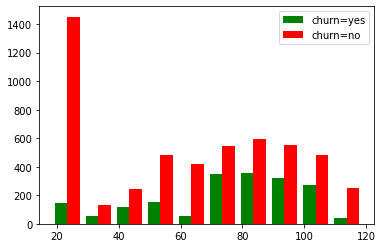

In [78]:
m_no =  df2[df2.Churn =="No"].MonthlyCharges
m_yes = df2[df2.Churn =="Yes"].MonthlyCharges
plt.hist([m_yes,m_no],color = ['green','red'],label = ['churn=yes','churn=no'])
plt.legend()

In [84]:
def print_unique_col_value(df):
    for column in df:
        if df[column].dtype == "object":
            print(f'{column} : {df[column].unique()}')
    

In [87]:
print_unique_col_value(df2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [91]:
df3 = df2.replace('No internet service','No')
df4 = df3.replace('No phone service','No')

In [93]:
print_unique_col_value(df4)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [95]:
y_n_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [97]:
for col in y_n_col:
    df4[col].replace({'Yes':1,'No':0},inplace = True)

In [99]:
print_unique_col_value(df4)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [103]:
df4['gender'].replace({'Female':1,'Male':0},inplace = True)

In [106]:
df5 = pd.get_dummies(data=df4,columns=['InternetService','Contract','PaymentMethod'])

In [108]:
df5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [111]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df5[col_to_scale] = scaler.fit_transform(df5[col_to_scale])
df5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [151]:
X  =df5.drop('Churn',axis=1)
y = df5.Churn

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [121]:
X_train.shape

(5625, 26)

In [124]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation ='relu'),
    keras.layers.Dense(15,activation ='relu'),
    keras.layers.Dense(1,activation ='sigmoid'),
    
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5178 - accuracy: 0.7394
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7911
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7977
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8036
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4075 - accura

In [126]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7832


[0.4654832184314728, 0.783226728439331]

In [128]:
yp = model.predict(X_test)
yp[:5]

array([[0.13050488],
       [0.48139814],
       [0.01286045],
       [0.82979715],
       [0.37296095]], dtype=float32)

In [131]:
y_p =[]
for i in yp:
    if i >0.5:
        y_p.append(1)
    else:
        y_p.append(0)
y_p[:5]
        

[0, 0, 0, 1, 0]

In [133]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [135]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.57      0.61       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407



In [230]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_p)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt ='d')


InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [1407] != values[1].shape = [2066] [Op:Pack] name: stack

In [138]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation ='relu'),
        keras.layers.Dense(15,activation ='relu'),
        keras.layers.Dense(1,activation ='sigmoid'),
    
    ])

    model.compile(optimizer = 'adam',
                 loss = loss,
                 metrics = ['accuracy'])

    if weights ==-1:
        model.fit(X_train,y_train,epochs =100)
    else:
        model.fit(X_train,y_train,epochs =100,class_weight =weights )
    print(model.evaluate(X_test,y_test))
    y_p  =model.predict(X_test)
    y_p = np.round(y_p)
    print('classification report: \n',classification_report(y_test,y_p))
    return y_p

In [139]:
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.7477
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7890
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8068
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8297
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8324
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8309
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8316: 0s - loss: 0.3660 - accuracy
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8332
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8288
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8336
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8336
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8308
Epoch 90/100
176/176 [==============================] - 0s 2ms/st

In [143]:
class_0,class_1 = df5.Churn.value_counts()
class_0,class_1

(5163, 1869)

In [157]:
df_0 = df5[df5.Churn == 0]
df_1 = df5[df5.Churn == 1]
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,0.098592,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8,1,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
13,0,0,0,0,0.676056,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [158]:
df_0_under = df_0.sample(class_1)
df_0_under.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2052,1,0,0,0,0.661972,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2687,0,0,0,0,0.380282,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1932,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3088,0,0,1,1,0.633803,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
6007,0,0,0,1,0.535211,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [160]:
df_under = pd.concat([df_0_under,df_1],axis =0)
df_under.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2052,1,0,0,0,0.661972,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2687,0,0,0,0,0.380282,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1932,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3088,0,0,1,1,0.633803,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
6007,0,0,0,1,0.535211,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [161]:
X  =df_under.drop('Churn',axis=1)
y = df_under.Churn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)

In [162]:
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5974 - accuracy: 0.7010
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.4887 - accuracy: 0.76 - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.77 - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7722: 0s - loss: 0.4760 - accuracy: 0.77
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accura

94/94 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7997
Epoch 81/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7997
Epoch 82/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8033
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8037
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8077
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8007
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8074
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8064
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8064
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8080
Epoch 90/100


In [166]:
df_1_over = df_1.sample(class_0,replace = True)
df_1_over.shape

(5163, 27)

In [167]:
df_over = pd.concat([df_0,df_1_over],axis =0)
df_over.shape

(10326, 27)

In [169]:
X  =df_over.drop('Churn',axis=1)
y = df_over.Churn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)

In [170]:
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7373
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4901 - accuracy: 0.7649
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7665
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7696
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7726
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7749
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7746
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7787
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7752
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4635 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8110
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8120
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8130
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8148
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8140
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8137
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8153
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8168
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8177
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 

In [171]:
X  =df5.drop('Churn',axis=1)
y = df5.Churn

In [177]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15,stratify = y_sm)

In [181]:
y_p = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5710 - accuracy: 0.7001
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7791
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7806
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7804
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7875
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7869
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.7908
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.7912
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7932
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4384 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8448
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8439
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8437
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8462
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8424
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8471: 0s - loss: 0.3437 - ac
Epoch 87/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8448
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8464
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8459
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - l

In [188]:
X  =df5.drop('Churn',axis=1)
y = df5.Churn

In [187]:
df5.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify = y)

In [216]:
df6 = X_train.copy()
df6['Churn'] = y_train
df6.shape

(5625, 27)

In [217]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [218]:
df_0 = df6[df6.Churn == 0]
df_1 = df6[df6.Churn == 1]

In [219]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train  =df_train.drop('Churn',axis=1)
    y_train = df_train.Churn
    return X_train,y_train

In [223]:
X_train,y_train = get_train_batch(df_0,df_1,0,1495)
yp1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6360 - accuracy: 0.6849
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7696: 0s - loss: 0.4853 - accuracy: 0.
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0

94/94 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8030
Epoch 83/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.8050
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8060
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8057
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8084
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8087
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.8087
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.8070
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4137 - accuracy: 0.8084
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8127
Epoch 92/100


In [224]:
X_train,y_train = get_train_batch(df_0,df_1,1495,2990)
yp2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.6843
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7462
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7569
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7579
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7605
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7609
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7692
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7652
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4057 - accuracy: 0.8033
Epoch 82/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4062 - accuracy: 0.8007
Epoch 83/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.7980
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.7977
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8027
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.7957
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4021 - accuracy: 0.8033
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4015 - accuracy: 0.8054
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8060
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8037
Epoch 91/100


In [225]:
X_train,y_train = get_train_batch(df_0,df_1,2990,4130)
yp3= ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6542 - accuracy: 0.6250
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7495
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7674
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7696
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7723
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7757
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7784
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7852
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7844: 0s - los

83/83 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.8277
Epoch 82/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8262
Epoch 83/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8243
Epoch 84/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8243
Epoch 85/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8235
Epoch 86/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8254
Epoch 87/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8258
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8277
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8304
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8269
Epoch 91/100


In [227]:
y_f = yp1.copy()
for i in range(len(yp1)):
    n= yp1[i]+yp2[i]+yp3[i]
    if n>1:
        y_f[i] = 1
    else:
        y_f[i]= 0

In [228]:
print(classification_report(y_test,y_f))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407

